<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q silence_tensorflow


In [2]:
# A libraries to avoid keras and tensorflow warnings
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

# A libraries to avoid other warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import os                                # To work with operation system comands
import pandas as pd                      # To work with DataFrames
import numpy as np                       # To work with arrays
import random                            # To generate random number and choices
import matplotlib.pyplot as plt          # To create plots and visualizations
import seaborn as sns                    # To create plots and visualizations
from termcolor import colored            # To create colorfull output
from PIL import Image                    # To read images from source

import tensorflow as tf                  # Main Franework
import keras

In [4]:
sns.set_style('darkgrid')



In [5]:
!kaggle datasets download -d antoreepjana/animals-detection-images-dataset

Dataset URL: https://www.kaggle.com/datasets/antoreepjana/animals-detection-images-dataset
License(s): CC0-1.0
 22% 1.94G/8.92G [01:16<04:34, 27.3MB/s]
User cancelled operation


In [6]:
!unzip \*.zip && rm *.zip

Archive:  animals-detection-images-dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of *.zip or
        *.zip.zip, and cannot find animals-detection-images-dataset.zip.ZIP, period.

No zipfiles found.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [8]:
train_dir = "/content/train"
test_dir = "/content/test"

labels = ['Butterfly',
       'Caterpillar','Chicken', 'Crab',
       'Deer', 'Duck', 'Eagle','Fish',
       'Frog', 'Giraffe','Goose', 'Horse',
       'Jellyfish', 'Ladybug', 'Lion',
       'Lizard','Monkey','Owl', 'Parrot',
       'Penguin',
       'Shark','Snail', 'Snake',
       'Sparrow', 'Spider','Squirrel',
       'Tiger', 'Tortoise','Whale']

label_len = len(labels)
print(label_len)


29


In [9]:
# Variables pour les données d'entraînement
X = []
Y = []

# Chargement des données
for label in labels:
    folderpath = os.path.join(train_dir, label)

    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)

        if img is not None:
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

# Conversion des listes en tableaux NumPy
X = np.array(X)
Y = np.array(Y)

In [10]:
print("Dimensions des données d'entraînement:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Dimensions des données d'entraînement:
X shape: (15219, 224, 224, 3)
Y shape: (15219,)


In [11]:
# Variables pour les données de validation
X_valid = []
Y_valid = []
X_valid_path = []

# Chargement des données
for label in labels:
    folderpath = os.path.join(test_dir, label)

    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)

        if img is not None:
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))

X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

In [12]:
print("\nDimensions des données de validation:")
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)


Dimensions des données de validation:
X_valid shape: (3922, 224, 224, 3)
Y_valid shape: (3922,)


In [13]:
total_images = X.shape[0] + X_valid.shape[0]
print("Nombre total d'images:", total_images)

Nombre total d'images: 19141


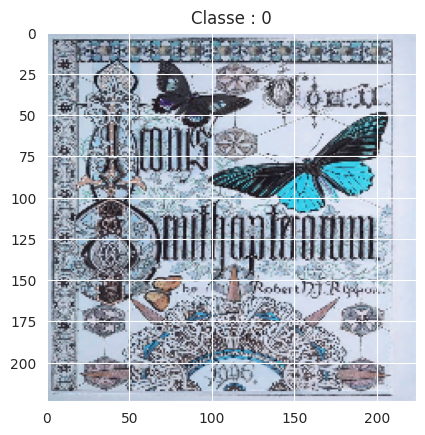

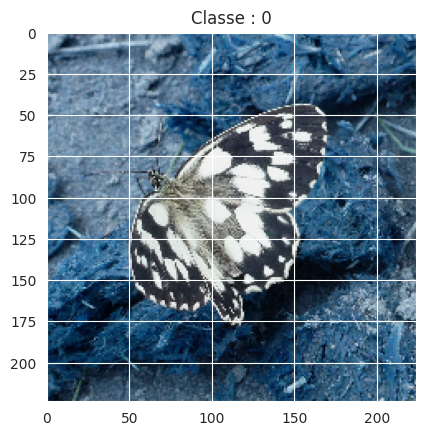

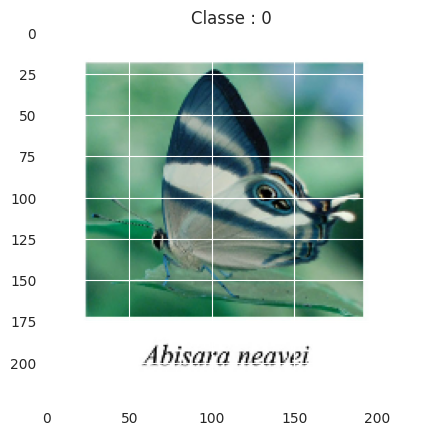

In [14]:
for i in range(3):
    plt.imshow(X[i])
    plt.title(f"Classe : {Y[i]}")
    plt.show()

In [15]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [16]:
base_model.trainable = False


In [17]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)


In [18]:
model = Model(inputs=base_model.input, outputs=predictions)


In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
# Conversion des labels en catégories one-hot
Y_one_hot = to_categorical(Y)
Y_valid_one_hot = to_categorical(Y_valid)


In [21]:
history = model.fit(X, Y_one_hot, epochs=1, validation_data=(X_valid, Y_valid_one_hot))


476/476 [==============================] - 3607s 8s/step - loss: 0.7577 - accuracy: 0.7783 - val_loss: 0.5148 - val_accuracy: 0.8519


In [22]:
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1)

123/123 [==============================] - 747s 6s/step


In [23]:
conf_matrix = confusion_matrix(Y_valid, Y_pred_classes)
acc_score = accuracy_score(Y_valid, Y_pred_classes)
print("Score précision:", acc_score)

Score précision: 0.8518612952575216


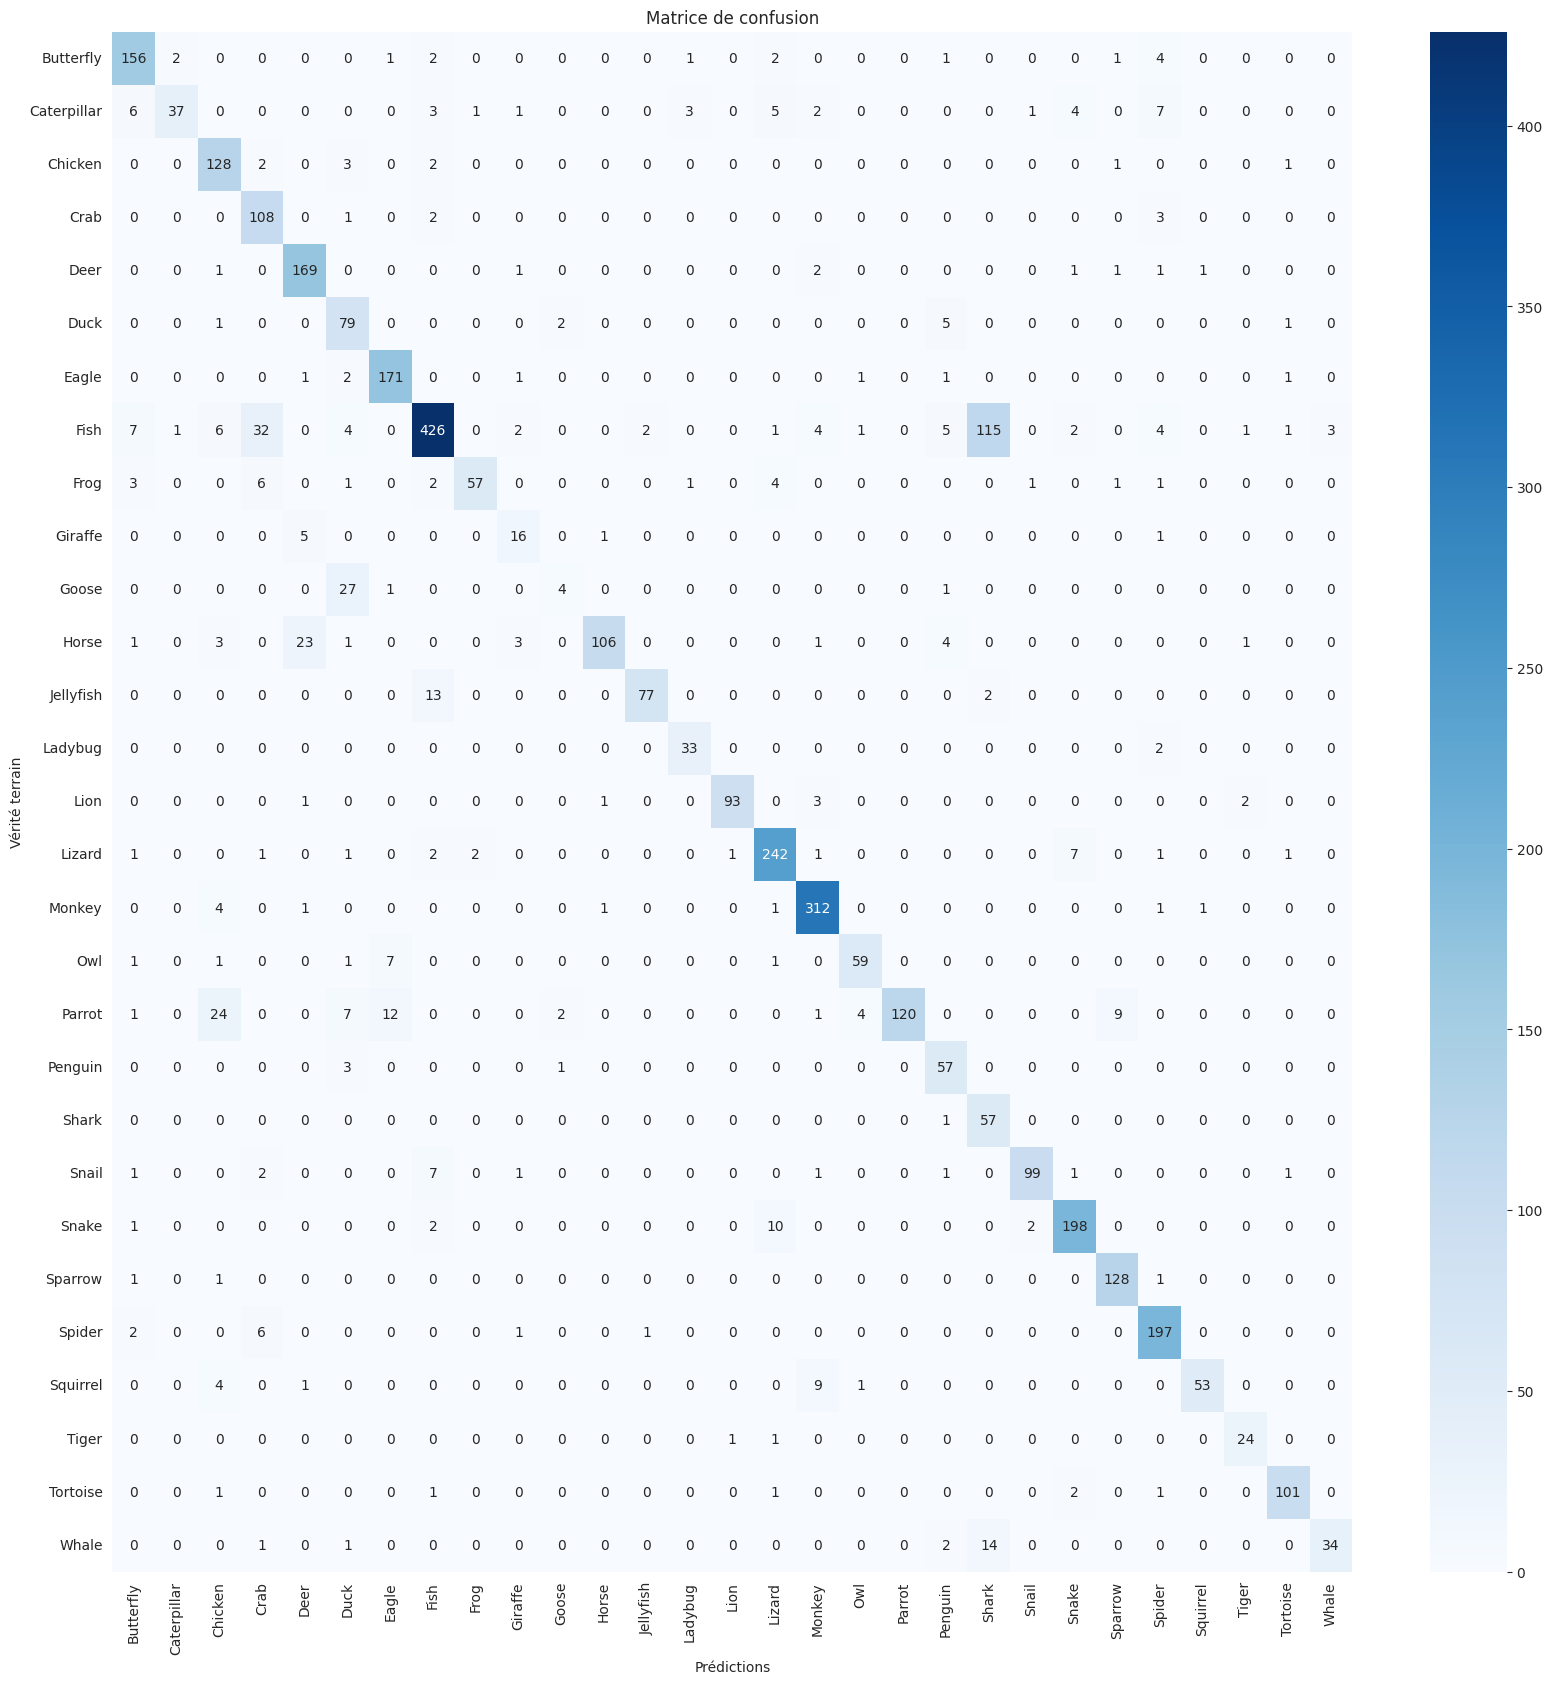

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.show()

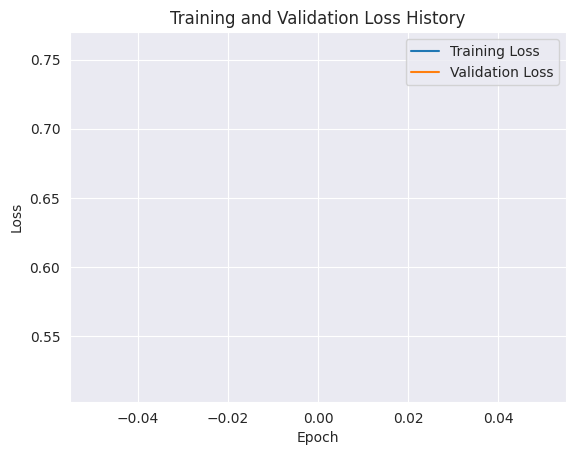

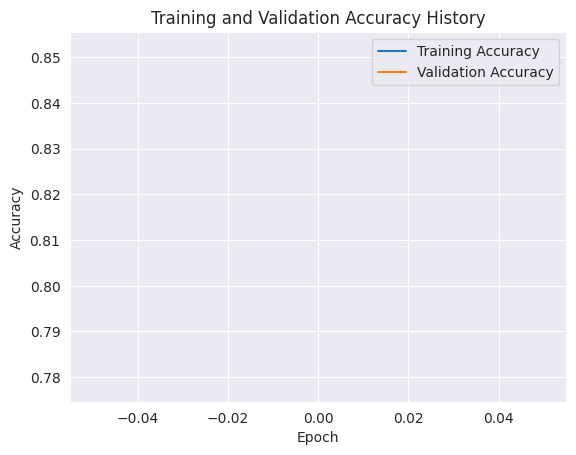

In [24]:
# Affichage de l'historique de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Affichage de l'historique de précision
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
report = classification_report(Y_valid, Y_pred_classes, target_names=labels)
print(report)

              precision    recall  f1-score   support

   Butterfly       0.86      0.92      0.89       170
 Caterpillar       0.93      0.53      0.67        70
     Chicken       0.74      0.93      0.82       137
        Crab       0.68      0.95      0.79       114
        Deer       0.84      0.95      0.89       177
        Duck       0.60      0.90      0.72        88
       Eagle       0.89      0.96      0.92       178
        Fish       0.92      0.69      0.79       617
        Frog       0.95      0.74      0.83        77
     Giraffe       0.62      0.70      0.65        23
       Goose       0.44      0.12      0.19        33
       Horse       0.97      0.74      0.84       143
   Jellyfish       0.96      0.84      0.90        92
     Ladybug       0.87      0.94      0.90        35
        Lion       0.98      0.93      0.95       100
      Lizard       0.90      0.93      0.92       260
      Monkey       0.93      0.97      0.95       321
         Owl       0.89    

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
model = load_model('ResNet50_DEL.h5')

# Load the labels
labels = ['Butterfly', 'Caterpillar', 'Chicken', 'Crab', 'Deer', 'Duck', 'Eagle', 'Fish',
          'Frog', 'Giraffe', 'Goose', 'Horse', 'Jellyfish', 'Ladybug', 'Lion', 'Lizard',
          'Monkey', 'Owl', 'Parrot', 'Penguin', 'Shark', 'Snail', 'Snake', 'Sparrow',
          'Spider', 'Squirrel', 'Tiger', 'Tortoise', 'Whale']

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame
    img = cv2.resize(frame, (224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image

    # Predict
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]
    label = labels[predicted_class]

    # Display the result
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Animal Classification', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close the windows
cap.release()
cv2.destroyAllWindows()
